In [26]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz-10.0.1-win64/bin/'

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [4]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290
...,...,...,...,...
9995,97112.86,0,12,25060.64248
9996,107424.63,1,16,21317.31764
9997,93856.99,0,4,20950.38812
9998,51250.57,1,7,16840.13376


In [5]:
dados_azar = dados.sort_values("vendido", ascending=True)
X_azar = dados_azar[["preco", "idade_do_modelo", "km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
10,75668.42,0,2,22635.36710
7,65265.09,0,10,18666.73466
3,95276.14,0,3,43167.32682
2,89627.50,0,12,11440.79806
4221,64724.65,0,10,13194.97866


In [7]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, X_azar, y_azar, cv=10)
media = results["test_score"].mean()
desvio_padrao = results["test_score"].std()
print(f"Accuracy com dummy stratified = [{media - 2*desvio_padrao}%, {media + 2*desvio_padrao}%]")

Accuracy com dummy stratified = [0.58%, 0.58%]


In [9]:
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X_azar, y_azar, cv=10)
media = results["test_score"].mean()
desvio_padrao = results["test_score"].std()
print(f"Accuracy com dummy stratified = [{media - 2*desvio_padrao}%, {media + 2*desvio_padrao}%]")

Accuracy com dummy stratified = [0.732631766053217%, 0.782968233946783%]


## Gerando dados aleatórios de modelo de carro para simular agrupamento ao usar nosso

In [11]:
dados["modelo"] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min())
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,17
1,40557.96,1,20,12622.05362,20
2,89627.50,0,12,11440.79806,11
3,95276.14,0,3,43167.32682,3
4,117384.68,1,4,12770.11290,6


In [12]:
def imprime_resultados(results):
    media = results["test_score"].mean()
    desvio_padrao = results["test_score"].std()
    print(f"Accuracy Médio {media}")
    print(f"Accuracy com dummy stratified = [{media - 2*desvio_padrao}%, {media + 2*desvio_padrao}%]")

### GroupKFOLD para anlisar o modelo com grupos

In [15]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo)
imprime_resultados(results)

Accuracy Médio 0.7577773186997147
Accuracy com dummy stratified = [0.7441430587738889%, 0.7714115786255404%]


# GroupKFold em um pipeline com StandardScaler e SVC

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([
    ("transformação", scaler), ("estimador", modelo)
])

cv = GroupKFold(n_splits=10)
results = cross_validate(pipeline, X_azar, y_azar, cv=cv, groups=dados.modelo)
imprime_resultados(results)

Accuracy Médio 0.7671040443184151
Accuracy com dummy stratified = [0.7511268819900816%, 0.7830812066467485%]


# Visualizando a árvore

In [21]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo)
imprime_resultados(results)

Accuracy Médio 0.7577773186997147
Accuracy com dummy stratified = [0.7441430587738889%, 0.7714115786255404%]


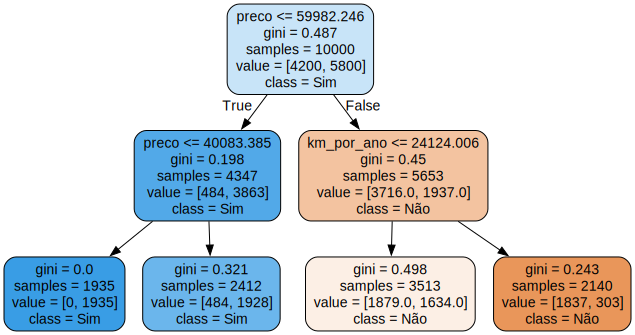

In [27]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(X_azar, y_azar)
features = X_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=["Não", "Sim"], feature_names=features)
graph = graphviz.Source(dot_data)
graph

In [28]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo)
imprime_resultados(results)

Accuracy Médio 0.7866746150096422
Accuracy com dummy stratified = [0.7668996359441729%, 0.8064495940751115%]


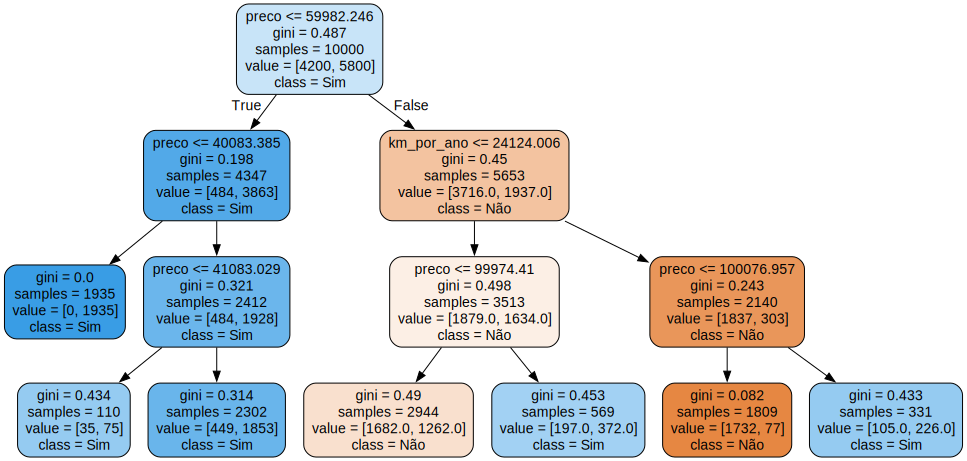

In [29]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(X_azar, y_azar)
features = X_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=["Não", "Sim"], feature_names=features)
graph = graphviz.Source(dot_data)
graph

# Testando Hiperparâmetros - 1D

In [46]:
def roda_avore_de_decisao(max_depth):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=True)
    # print(f"Arvore max_depth = {max_depth}, treino = {results['train_score'].mean():.2f}, teste = {results['test_score'].mean():.2f}")

    train_score = results['train_score'].mean()
    test_score = results['test_score'].mean()
    tabela = [max_depth, train_score, test_score]
    return tabela

resultados = [roda_avore_de_decisao(i) for i in range(1, 33)]
resultados = pd.DataFrame(resultados, columns=["max_depth", "train", "teste"])
resultados.head()

,max_depth,train,teste
0,1,0.757911,0.757777
1,2,0.757911,0.757777
2,3,0.787566,0.786675
3,4,0.787978,0.786484
4,5,0.789210,0.785382


### Overfitting

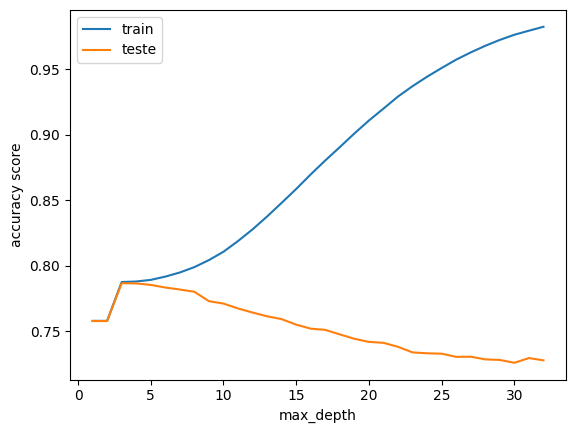

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = resultados, x="max_depth", y="train", label="train")
sns.lineplot(data = resultados, x="max_depth", y="teste", label="teste")
plt.ylabel("accuracy score")
plt.legend()

# Testando Hiperparâmetros - 2D

In [ ]:
def roda_avore_de_decisao(max_depth, min_samples_leaf):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=True)
    # print(f"Arvore max_depth = {max_depth}, treino = {results['train_score'].mean():.2f}, teste = {results['test_score'].mean():.2f}")

    train_score = results['train_score'].mean()
    test_score = results['test_score'].mean()
    tabela = [max_depth, train_score, test_score]
    return tabela

resultados = [roda_avore_de_decisao(i) for i in range(1, 33)]
resultados = pd.DataFrame(resultados, columns=["max_depth", "train", "teste"])
resultados.head()

,max_depth,train,teste
0,1,0.757911,0.757777
1,2,0.757911,0.757777
2,3,0.787566,0.786675
3,4,0.787978,0.786484
4,5,0.789210,0.785382


### Overfitting

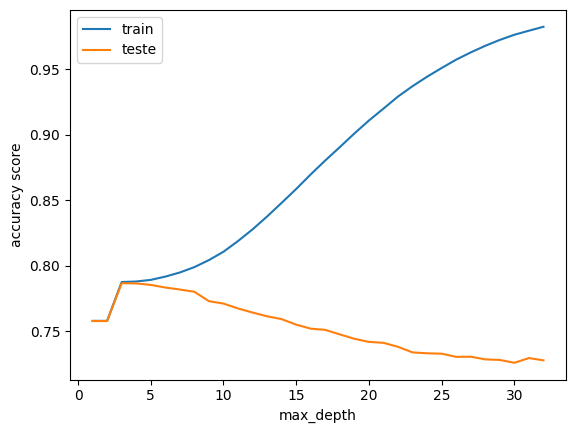

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = resultados, x="max_depth", y="train", label="train")
sns.lineplot(data = resultados, x="max_depth", y="teste", label="teste")
plt.ylabel("accuracy score")
plt.legend()